<a href="https://colab.research.google.com/github/meishihna/GITHUB-COLAB/blob/main/Stocker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stocker 教學 （FinLab Python）
相關連結
https://www.finlab.tw/超簡單-machine-learning-預測股價/

### 下載並安裝相關程式

In [1]:
!git clone https://github.com/koreal6803/Stocker.git
!pip install -r Stocker/requirements.txt
!pip install yfinance -q

### 刪除警告以及讀入台積電股價

In [ ]:
import pandas as pd
import yfinance as yf

# 讀入series
df = yf.Ticker("2330.TW").history(period="max")
price = df.Close
price

Date
2000-01-04     35.996826
2000-01-05     36.805672
2000-01-06     35.996826
2000-01-07     34.985619
2000-01-10     36.198978
                 ...    
2022-05-12    505.000000
2022-05-13    511.000000
2022-05-16    520.000000
2022-05-17    530.000000
2022-05-18    538.000000
Name: Close, Length: 5586, dtype: float64

### 開始使用預言家

In [ ]:
from Stocker.stocker import Stocker

tsmc = Stocker(price)

the stock Stocker Initialized. Data covers 2000-01-04 00:00:00 to 2022-05-18 00:00:00.


### 預言股價中期走勢

Predicted Price on 2022-08-16 00:00:00 = $527.72


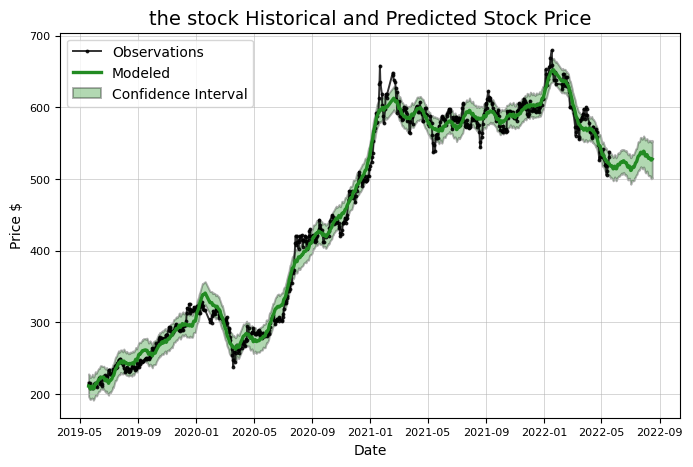

In [ ]:
model, model_data = tsmc.create_prophet_model(days=90)

### 評估預測與真實的結果差異


Prediction Range: 2021-05-18 00:00:00 to 2022-05-18 00:00:00.

Predicted price on 2022-05-17 00:00:00 = $804.72.
Actual price on    2022-05-17 00:00:00 = $530.00.

Average Absolute Error on Training Data = $8.62.
Average Absolute Error on Testing  Data = $123.44.

When the model predicted an increase, the price increased 42.59% of the time.
When the model predicted a  decrease, the price decreased  48.78% of the time.

The actual value was within the 80% confidence interval 64.49% of the time.


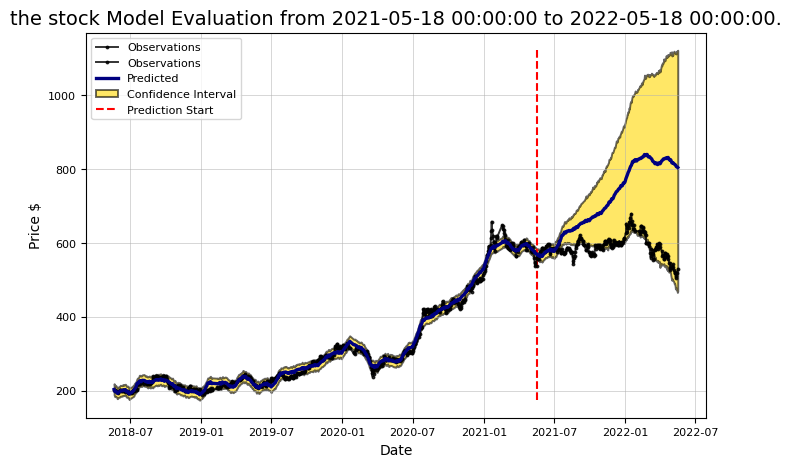

In [ ]:
tsmc.evaluate_prediction()

### 同時預測短中長期股價

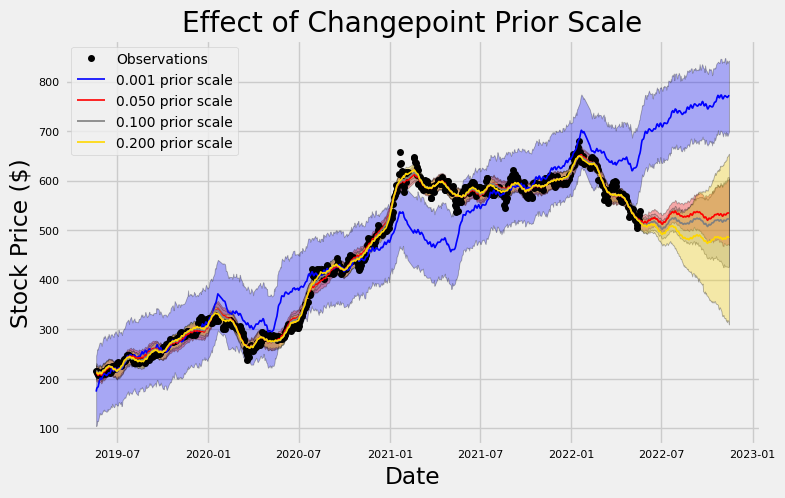

In [ ]:
tsmc.changepoint_prior_analysis(changepoint_priors=[0.001, 0.05, 0.1, 0.2])

### 預測中期股價及區間


Predicted Increase: 

          Date    estimate    change       upper       lower
9   2022-05-27  508.335851  0.003347  521.900158  495.522381
11  2022-05-29  510.178330  1.842479  523.873240  496.835370
15  2022-06-02  506.725271  0.122848  521.566195  493.769074
16  2022-06-03  508.382607  1.657336  522.305675  494.666294
18  2022-06-05  511.013687  2.631080  525.271377  497.286101
21  2022-06-08  509.394060  0.046942  525.101718  494.830028
22  2022-06-09  510.775032  1.380973  526.466733  494.972594
23  2022-06-10  512.455911  1.680878  527.782137  497.754504
28  2022-06-15  510.709949  0.609753  527.778488  494.618153
29  2022-06-16  511.755906  1.045957  529.045600  495.994738
30  2022-06-17  511.911072  0.155166  529.049816  495.679864
41  2022-06-28  497.640853  0.218831  516.941825  478.394779
47  2022-07-04  493.166847  1.599694  516.659115  470.807118
48  2022-07-05  494.383149  1.216302  517.980959  470.924044
53  2022-07-10  496.867114  3.726634  523.134780  472.350634
5

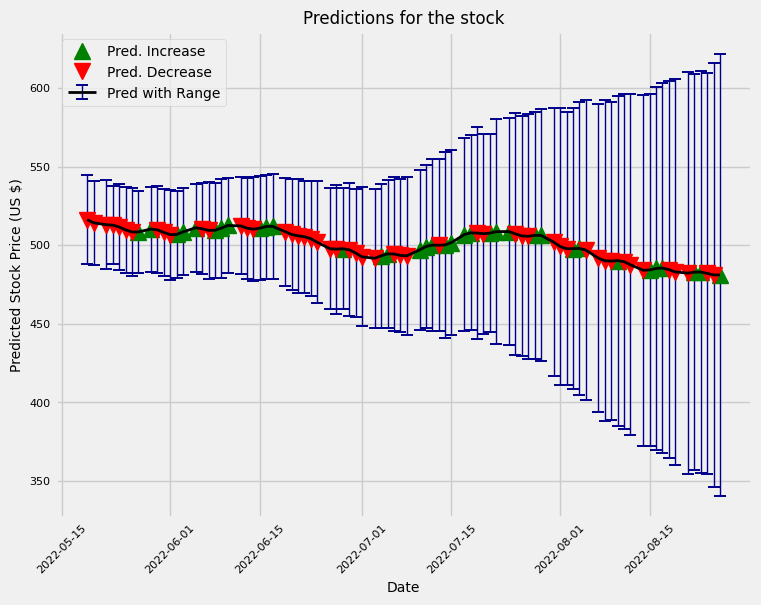

In [ ]:
tsmc.predict_future(days=100)